## Python statistics essential training - 05_05_logistic

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# fix error in some versions of statsmodels
import scipy
if not hasattr(scipy.stats,'chisqprob'):
    scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)

In [6]:
smoking = pd.read_csv("whickham.csv")

In [7]:
smoking = smoking[smoking.age < 65]

In [8]:
smoking.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
4,Alive,No,64
5,Alive,Yes,38
6,Alive,Yes,45


In [9]:
smoking['outcome'] = (smoking['outcome'] == 'Alive').astype(int)

In [13]:
color = np.where(smoking.smoker == 'No','skyblue','coral')
jitter = 0.05*(np.random.rand(len(smoking)) - 0.5)
def plotfit(fit):
    pp.scatter(smoking.age,smoking.outcome + jitter,c=color,linewidth=0.2,edgecolor='k',alpha=0.5)
    pp.scatter(smoking.age,fit.predict(smoking),c=color,linewidth=0.2,edgecolor='gray',marker='d')

In [14]:
ols_group_age = smf.ols(formula='outcome ~ smoker + age',data=smoking).fit()

Text(0, 0.5, 'Alive(1)/Dead(0)')

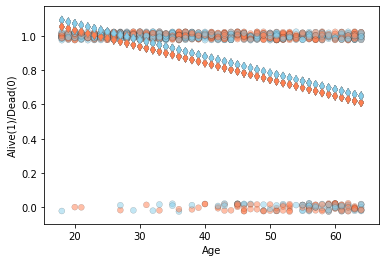

In [20]:
plotfit(ols_group_age)
pp.xlabel('Age')
pp.ylabel('Alive(1)/Dead(0)')

We do see an association between smoking and negative (dead) outcomes.

In [22]:
ols_group_age.params

Intercept        1.264665
smoker[T.Yes]   -0.038738
age             -0.009615
dtype: float64

In [23]:
sm.stats.anova_lm(ols_group_age)

,df,sum_sq,mean_sq,F,PR(>F)
smoker,1.0,0.899981,0.899981,8.181417,4.314608e-03
age,1.0,17.713821,17.713821,161.030213,1.806638e-34
Residual,1068.0,117.483303,0.110003,NaN,NaN


The association is not very strong, with an F stats of ~8.  
Age seems to be far more associated with negative outcome.

In [24]:
ols_group_age.conf_int()

,0,1
Intercept,1.198828,1.330503
smoker[T.Yes],-0.078622,0.001146
age,-0.011102,-0.008129


The plot above show a mathematical problem. Some of the predicted value are above 1.  
The outcome has to be restricted to either 1 or 0, or values between 0 and 1, which can be understood as probability of belonging to the positive class.

Logistic regression model does this.

## Logistic Regression

In [25]:
logit_smoker_age = smf.logit('outcome ~ smoker + age',data = smoking).fit()

Optimization terminated successfully.
         Current function value: 0.346766
         Iterations 7


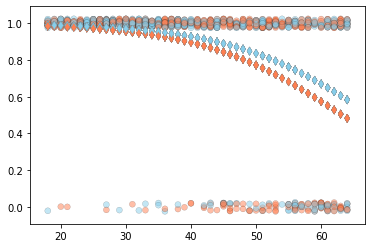

In [26]:
plotfit(logit_smoker_age)

The predicted values are now bouded between 0 and 1.

The criterion for logistic regression is not minimizing MSE, but rather interpreting the model response as a probability function and maximizing the resulting probability of the observed data. This is a from of maximum likelyhood estimation.

So instead of MSE, the simplest way to characterize goodness of fit is the value of the lieklyhood.

In [30]:
logit_smoker_age.llf # logarithm of the likelyhood function

-371.38650786619064

In [29]:
logit_smoker_age.params

Intercept        6.250847
smoker[T.Yes]   -0.408103
age             -0.092403
dtype: float64

Smoking reduces the probablity of life but not uniformly.

In [32]:
logit_smoker_age.conf_int()

,0,1
Intercept,5.331126,7.170568
smoker[T.Yes],-0.777754,-0.038451
age,-0.109478,-0.075327


In [33]:
print(logit_smoker_age.summary())

                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                 1071
Model:                          Logit   Df Residuals:                     1068
Method:                           MLE   Df Model:                            2
Date:                Mon, 25 May 2020   Pseudo R-squ.:                  0.1776
Time:                        16:22:22   Log-Likelihood:                -371.39
converged:                       True   LL-Null:                       -451.59
Covariance Type:            nonrobust   LLR p-value:                 1.469e-35
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.2508      0.469     13.321      0.000       5.331       7.171
smoker[T.Yes]    -0.4081      0.189     -2.164      0.030      -0.778      -0.038
age              -0.0924      0.009    -

In [34]:
print(logit_smoker_age.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.178     
Dependent Variable: outcome          AIC:              748.7730  
Date:               2020-05-25 16:22 BIC:              763.7021  
No. Observations:   1071             Log-Likelihood:   -371.39   
Df Model:           2                LL-Null:          -451.59   
Df Residuals:       1068             LLR p-value:      1.4690e-35
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         6.2508   0.4693  13.3208 0.0000  5.3311  7.1706
smoker[T.Yes]    -0.4081   0.1886  -2.1638 0.0305 -0.7778 -0.0385
age              -0.0924   0.0087 -10.6063 0.0000 -0.1095 -0.0753

